In [1]:
path_rating = '/content/drive/MyDrive/Movie recommendation system/Recomandetion system/recoo/rating.csv'
path_movie = '/content/drive/MyDrive/Movie recommendation system/Recomandetion system/recoo/movie.csv'
path_tags = '/content/drive/MyDrive/Movie recommendation system/Recomandetion system/recoo/tagss.csv'

In [2]:
import pandas as pd
import numpy as np
import pickle
import sys
import matplotlib.pyplot as plt
# importing a file
df_movie = pd.read_csv(path_movie)

# setting up the index
movie = df_movie.set_index("Sno")

In [3]:
movie.head()

,movieid,title,genere,Unnamed: 4
Sno,,,,
0,1,sajan,romance/tragedy,NaN
1,2,waqt,romance/horror,NaN
2,3,jigar,action/romance,NaN
3,4,chandni,romance,NaN
4,5,saudagar,romance/action,NaN


In [4]:
# next two files rating and tags
rating = pd.read_csv(path_rating)
rating.head()

,userid,movieid,rating
0,200,29,4
1,76,17,1
2,72,68,5
3,119,73,5
4,191,57,5


In [5]:
tags = pd.read_csv(path_tags)
tags.head()

,userid,movieid,tag
0,200.0,29.0,romantic and action
1,76.0,17.0,romance
2,72.0,68.0,best movie
3,119.0,73.0,cool movie
4,191.0,57.0,romantic and action


In [6]:
str1 = "hi how are you" # [hi, how, are, you]==>[0.101,0.321,0.156,.169]
str2 = " hi, we are fine what about you" # = []
str3 = " it is nice to find you here"

In [7]:
n1 = 4
n2 = 6
n3 = 7

N = 3 # total number of documents

# Term frequency
#tf('hi',str1) = no. of times hi appear in st1/ total number of words in str1
#tf('hi',str2) = no. of times hi appear in st2/ total number of words in str2

tf_hi_s1 = 1/4
tf_hi_s2 = 1/7

print("term frequency of hi in document str1 and str2 are %.3f, %.3f" % (tf_hi_s1,tf_hi_s2))

term frequency of hi in document str1 and str2 are 0.250, 0.143


In [8]:
# Inverse Document Frequency
# IDF_word = np.log(total_no_documents_in_corpus/number_of_doc_word)
IDF_hi = np.log(N/2)
print("Inverse Document Frequency of hi is %.3f" % (IDF_hi))

Inverse Document Frequency of hi is 0.405


In [9]:
tf_idf_hi_s1 = tf_hi_s1*IDF_hi
tf_idf_hi_s2 = tf_hi_s2*IDF_hi
print("term frequency-inverse document frequency of hi in document str1 and str2 are %.3f, %.3f" % (tf_idf_hi_s1,tf_idf_hi_s2))

term frequency-inverse document frequency of hi in document str1 and str2 are 0.101, 0.058


In [10]:
movie['genere']

Sno
0          romance/tragedy
1           romance/horror
2           action/romance
3                  romance
4           romance/action
              ...         
71          drama/thriller
72           crime/mystery
73    crime/drama/thriller
74            comedy/drama
75          thriller/crime
Name: genere, Length: 75, dtype: object

In [11]:
movie['genere'] = movie['genere'].str.replace('/',' ')#'To replace / by " "
no_movieid = len(rating.movieid.unique())#to check how many movies of movie set are rated by user
no_movieid
#movie['genere']

75

In [12]:
movie['genere']#to check wether / have been removed or not

Sno
0          romance tragedy
1           romance horror
2           action romance
3                  romance
4           romance action
              ...         
71          drama thriller
72           crime mystery
73    crime drama thriller
74            comedy drama
75          thriller crime
Name: genere, Length: 75, dtype: object

In [13]:
#consider only those users who have rated atleast 2 movies
#print(len(rating))
rating_f = rating.groupby('userid').filter(lambda x: len(x)>=2)
#print(len(rating_f))
movie_list = movie.title.unique().tolist()
movie_id = rating_f.movieid.unique().tolist()

#id of those movies which have rating equal or more than two
print(movie_list)
#print(movie_id)

['sajan', 'waqt', 'jigar', 'chandni', 'saudagar', 'awara', 'trianga', 'pakiza', 'shool', 'aag', 'daag', 'nagin', 'gangajal', 'hum', 'yaarana', 'hero', 'hatya', 'hero no1', 'rajababu', 'partner', 'terenaam', 'wanted', 'coolie', 'ramlakhan', 'bandhan', 'aunty no1', 'jollyllb', 'dabang', 'special 26', 'golmaal', 'rafoochakker', 'chacha bhatija', 'joker', 'sangam', 'boby', 'milan', 'delhi 6', 'gopi kishan', 'warrant', 'cheeta', 'dil', 'deewana', 'loha', 'burning train', 'avroadh', 'state of sieze', 'sory by ravindranath', 'rangbaaz', 'sacred games', 'mirzapur2', 'kota factory', 'asur', 'scam1992', 'paatal lok', 'undekhi', 'special ops', 'panchayat', 'inside edge', 'tvf pitches', 'college romance', 'permanent roommates', 'hostel daze', 'tvf tripling', 'breathe', 'flames', 'bang baja barat', 'baked', 'apharan', 'aarya', 'bandish bandits', 'JL50', 'Hostage', 'criminal justice', 'aam admi family', 'the exipiry date']


In [14]:
#now we update our movie data set by using id's
#these are those movie id for which atleast two user have rated
movie = movie[movie.movieid.isin(movie_id)]
print(movie)

     movieid             title                genere Unnamed: 4
Sno                                                            
0          1             sajan       romance tragedy        NaN
1          2              waqt        romance horror        NaN
2          3             jigar        action romance        NaN
3          4           chandni               romance        NaN
4          5          saudagar        romance action        NaN
..       ...               ...                   ...        ...
71        70              JL50        drama thriller        NaN
72        72           Hostage         crime mystery        NaN
73        73  criminal justice  crime drama thriller        NaN
74        74   aam admi family          comedy drama        NaN
75        75  the exipiry date        thriller crime        NaN

[75 rows x 4 columns]


In [15]:
#I am creating a mapping file of movie id and movie title
mapping_file = dict(zip(movie.movieid.tolist(),movie.title.tolist()))
mapping_file

{1: 'sajan',
 2: 'waqt',
 3: 'jigar',
 4: 'chandni',
 5: 'saudagar',
 6: 'awara',
 7: 'trianga',
 8: 'pakiza',
 9: 'shool',
 10: 'aag',
 11: 'daag',
 12: 'nagin',
 13: 'gangajal',
 14: 'hum',
 15: 'yaarana',
 16: 'hero',
 17: 'hatya',
 18: 'hero no1',
 19: 'rajababu',
 20: 'partner',
 21: 'terenaam',
 22: 'wanted',
 23: 'coolie',
 24: 'ramlakhan',
 25: 'bandhan',
 26: 'aunty no1',
 27: 'jollyllb',
 28: 'dabang',
 29: 'special 26',
 30: 'golmaal',
 31: 'rafoochakker',
 32: 'chacha bhatija',
 33: 'joker',
 34: 'sangam',
 35: 'boby',
 36: 'milan',
 37: 'delhi 6',
 38: 'gopi kishan',
 39: 'warrant',
 40: 'cheeta',
 41: 'dil',
 42: 'deewana',
 43: 'loha',
 44: 'burning train',
 45: 'state of sieze',
 46: 'sory by ravindranath',
 47: 'rangbaaz',
 48: 'sacred games',
 49: 'mirzapur2',
 50: 'kota factory',
 51: 'asur',
 52: 'scam1992',
 53: 'paatal lok',
 54: 'undekhi',
 55: 'special ops',
 56: 'panchayat',
 57: 'inside edge',
 59: 'tvf pitches',
 60: 'college romance',
 61: 'permanent roommat

Merge movie data set which contain genere and tags which containing description

In [16]:
movie

,movieid,title,genere,Unnamed: 4
Sno,,,,
0,1,sajan,romance tragedy,NaN
1,2,waqt,romance horror,NaN
2,3,jigar,action romance,NaN
3,4,chandni,romance,NaN
4,5,saudagar,romance action,NaN
...,...,...,...,...
71,70,JL50,drama thriller,NaN
72,72,Hostage,crime mystery,NaN
73,73,criminal justice,crime drama thriller,NaN


In [17]:
tags

,userid,movieid,tag
0,200.0,29.0,romantic and action
1,76.0,17.0,romance
2,72.0,68.0,best movie
3,119.0,73.0,cool movie
4,191.0,57.0,romantic and action
...,...,...,...
1116,NaN,NaN,NaN
1117,NaN,NaN,NaN
1118,NaN,NaN,NaN
1119,NaN,NaN,NaN


In [18]:
mixed = pd.merge(movie,tags,on='movieid',how='left')

In [19]:
mixed

,movieid,title,genere,Unnamed: 4,userid,tag
0,1,sajan,romance tragedy,NaN,191.0,cool movie
1,1,sajan,romance tragedy,NaN,64.0,wonderfull
2,1,sajan,romance tragedy,NaN,119.0,great action fighting
3,1,sajan,romance tragedy,NaN,200.0,fighting
4,1,sajan,romance tragedy,NaN,123.0,super acting
...,...,...,...,...,...,...
990,75,the exipiry date,thriller crime,NaN,9.0,romantic and action
991,75,the exipiry date,thriller crime,NaN,138.0,action
992,75,the exipiry date,thriller crime,NaN,182.0,great
993,75,the exipiry date,thriller crime,NaN,162.0,great


In [20]:
#combine all tags row wise to form a single row
#group by create a small dataframe
mixed  = pd.DataFrame(mixed.groupby('movieid')['tag'].apply(lambda x: '%s' % ' '.join(x) ))
mixed

,tag
movieid,
1,cool movie wonderfull great action fighting fi...
2,romantic good songs entertaining movie awesome...
3,nice acting full of action great work great mo...
4,old is gold cool movie action nice acting susp...
5,acting is best songs are good great acting sus...
...,...
70,action and good acting super acting great grea...
72,fight and action nice movie horror movie wonde...
73,cool movie action patriotsm awesome action pat...


In [21]:
#creating metadata = genere + tag(Comments)
final = pd.merge(movie,mixed,on = 'movieid',how='left')
final['metadata'] = final[['genere','tag']].apply(lambda x: ' ' .join(x),axis=1)
final1 = pd.DataFrame(final[['movieid','title','metadata']])
final1

,movieid,title,metadata
0,1,sajan,romance tragedy cool movie wonderfull great ac...
1,2,waqt,romance horror romantic good songs entertainin...
2,3,jigar,action romance nice acting full of action grea...
3,4,chandni,romance old is gold cool movie action nice act...
4,5,saudagar,romance action acting is best songs are good g...
...,...,...,...
70,70,JL50,drama thriller action and good acting super ac...
71,72,Hostage,crime mystery fight and action nice movie horr...
72,73,criminal justice,crime drama thriller cool movie action patriot...
73,74,aam admi family,comedy drama fighting action movie great actin...


In [22]:
#Feature Engineering
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = None)
tfidf_matrix = tfidf.fit_transform(final1['metadata'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(),index = final1.movieid.tolist())
#rows give movies and columns give all possible words
tfidf_df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
1,0.199113,0.176605,0.0,0.000000,0.094360,0.000000,0.0,0.000000,0.119220,0.0,...,0.140689,0.000000,0.000000,0.0,0.180344,0.317614,0.256553,0.000000,0.205987,0.249062
2,0.222696,0.263363,0.0,0.000000,0.211071,0.134469,0.0,0.161606,0.000000,0.0,...,0.000000,0.129245,0.000000,0.0,0.134469,0.000000,0.095646,0.170861,0.000000,0.092853
3,0.330395,0.219785,0.0,0.163032,0.156574,0.000000,0.0,0.000000,0.197825,0.0,...,0.116725,0.000000,0.000000,0.0,0.000000,0.000000,0.212854,0.000000,0.170900,0.309957
4,0.252207,0.372829,0.0,0.000000,0.239042,0.152289,0.0,0.000000,0.000000,0.0,...,0.118803,0.292745,0.000000,0.0,0.000000,0.000000,0.108321,0.000000,0.000000,0.000000
5,0.240607,0.213409,0.0,0.237453,0.228048,0.217927,0.0,0.000000,0.288129,0.0,...,0.000000,0.209461,0.000000,0.0,0.000000,0.000000,0.155009,0.276906,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.534263,0.236935,0.0,0.000000,0.253188,0.000000,0.0,0.000000,0.000000,0.0,...,0.377499,0.000000,0.290779,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
72,0.000000,0.176413,0.0,0.000000,0.282771,0.000000,0.0,0.000000,0.119090,0.0,...,0.140536,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.205762,0.000000
73,0.079939,0.212707,0.0,0.000000,0.075766,0.000000,0.0,0.348061,0.095727,0.0,...,0.000000,0.000000,0.174030,0.0,0.000000,0.000000,0.103000,0.000000,0.000000,0.199984
74,0.228340,0.405056,0.0,0.000000,0.108210,0.000000,0.0,0.000000,0.000000,0.0,...,0.161340,0.000000,0.000000,0.0,0.206816,0.000000,0.147106,0.000000,0.000000,0.000000


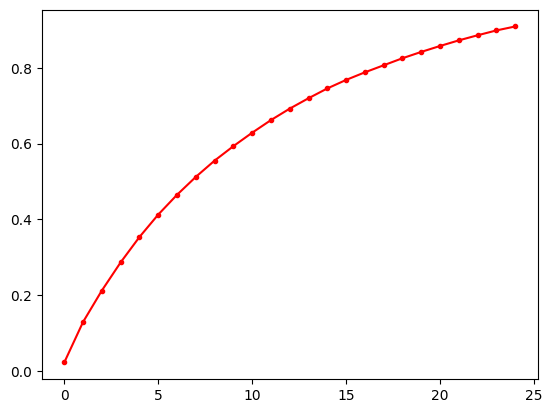

In [23]:
#truncated svd for reducing components of the vector
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=25)#we have chosen 25 components
latent_matrix = svd.fit_transform(tfidf_df)
expl_var = svd.explained_variance_ratio_.cumsum()
plt.plot(expl_var,'.-',color='red')

In [24]:
latent_matrix #shows 75 movies and top 25 best components for searching
latent = latent_matrix.tolist()
lat_arr = np.array(latent)
lat_arr
lat_arr_df  = pd.DataFrame(lat_arr,index=movie.title.tolist())
lat_arr_df
print(len(lat_arr))
print(lat_arr_df)

75
                        0         1         2         3         4         5   \
sajan             0.729445 -0.034436 -0.040150 -0.219356  0.138304  0.091823   
waqt              0.836253 -0.141179 -0.149063 -0.106601  0.059525 -0.181842   
jigar             0.836092 -0.219628  0.046336  0.086385 -0.080770  0.261414   
chandni           0.729829 -0.245860  0.055435 -0.311785  0.343828 -0.178826   
saudagar          0.738034 -0.256153 -0.044163  0.192000  0.212331  0.161460   
...                    ...       ...       ...       ...       ...       ...   
JL50              0.690786 -0.282005  0.435746  0.122174 -0.272516 -0.104508   
Hostage           0.582592  0.250618 -0.043108  0.325848  0.083312 -0.235813   
criminal justice  0.713520  0.282119  0.106875 -0.158496 -0.035200  0.095081   
aam admi family   0.804943  0.160179 -0.112826 -0.072236 -0.286502 -0.029331   
the exipiry date  0.613528  0.009969  0.054617  0.426649  0.079319 -0.074790   

                        6         7 

content based filtering

In [25]:
#latent matrix from content filtering
latent_matrix
#setting an array in dataframe
latent_matrix1_df = pd.DataFrame(latent_matrix[:,0:25],index = final.title.tolist())
latent_matrix1_df # used to calculate cosine similarity

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
sajan,0.729445,-0.034436,-0.040150,-0.219356,0.138304,0.091823,0.243635,0.124654,0.120813,-0.256789,...,0.198893,0.102703,-0.112820,-0.086050,-0.203961,0.134264,-0.039416,0.084437,-0.002177,0.002325
waqt,0.836253,-0.141179,-0.149063,-0.106601,0.059525,-0.181842,-0.081500,-0.067009,-0.157499,0.142671,...,-0.039678,0.092271,-0.141849,-0.025593,-0.005359,-0.014666,0.075702,-0.153558,0.056223,0.024979
jigar,0.836092,-0.219628,0.046336,0.086385,-0.080770,0.261414,0.143880,-0.163234,0.088124,0.132626,...,0.144821,-0.115279,-0.033679,-0.020527,-0.029071,0.137024,-0.014318,0.047045,0.079416,0.072626
chandni,0.729829,-0.245860,0.055435,-0.311785,0.343828,-0.178826,-0.222401,0.045815,0.106529,-0.021862,...,-0.087704,0.033584,0.027240,0.102660,-0.054573,0.042112,-0.032240,0.078117,0.045545,-0.006823
saudagar,0.738034,-0.256153,-0.044163,0.192000,0.212331,0.161460,-0.135886,-0.189551,-0.080211,-0.029123,...,0.114143,-0.024607,0.150987,0.068356,-0.033138,0.031725,-0.085520,-0.112886,-0.148394,0.055268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JL50,0.690786,-0.282005,0.435746,0.122174,-0.272516,-0.104508,0.030149,0.099027,-0.026072,0.059535,...,0.041729,0.030239,0.090104,-0.040290,0.066820,0.004390,0.064469,0.081048,0.070624,-0.054172
Hostage,0.582592,0.250618,-0.043108,0.325848,0.083312,-0.235813,0.065829,0.232795,0.345358,-0.113341,...,0.106564,-0.021397,-0.015265,-0.104085,0.047191,-0.015797,0.088767,-0.041514,0.033243,-0.119295
criminal justice,0.713520,0.282119,0.106875,-0.158496,-0.035200,0.095081,-0.004799,0.059954,0.008130,0.105806,...,0.086154,0.163439,0.244999,0.123915,0.040947,-0.027067,0.277121,0.008729,-0.072231,0.040466
aam admi family,0.804943,0.160179,-0.112826,-0.072236,-0.286502,-0.029331,0.077417,0.268728,-0.130169,-0.050953,...,0.004625,0.012406,0.012304,0.047572,-0.013084,-0.049025,-0.074754,-0.056709,0.087890,-0.003640


In [26]:
from sklearn.metrics.pairwise import cosine_similarity
score_1 = cosine_similarity(latent_matrix1_df,latent_matrix1_df)
score_1_df = pd.DataFrame(score_1,index = final.title.tolist(),columns=final.title.tolist())
score_1_df

,sajan,waqt,jigar,chandni,saudagar,awara,trianga,pakiza,shool,aag,...,bang baja barat,baked,apharan,aarya,bandish bandits,JL50,Hostage,criminal justice,aam admi family,the exipiry date
sajan,1.000000,0.566577,0.669657,0.652744,0.529991,0.512058,0.499005,0.448812,0.491930,0.603431,...,0.613415,0.480622,0.515124,0.571601,0.491828,0.437678,0.552032,0.542694,0.629788,0.360636
waqt,0.566577,1.000000,0.669127,0.729095,0.695312,0.742607,0.624620,0.550601,0.610539,0.684296,...,0.724123,0.720334,0.650232,0.695551,0.546918,0.514973,0.429710,0.536534,0.644294,0.524654
jigar,0.669657,0.669127,1.000000,0.530443,0.739672,0.726006,0.665551,0.570757,0.464970,0.743642,...,0.709503,0.681413,0.675956,0.591325,0.731119,0.681345,0.395709,0.564377,0.597659,0.459029
chandni,0.652744,0.729095,0.530443,1.000000,0.643063,0.611947,0.489792,0.332444,0.581205,0.586386,...,0.733289,0.571757,0.531108,0.651795,0.521079,0.497017,0.368398,0.464217,0.490379,0.430072
saudagar,0.529991,0.695312,0.739672,0.643063,1.000000,0.698274,0.481828,0.392295,0.525481,0.607030,...,0.621262,0.623293,0.570064,0.541899,0.554717,0.459839,0.347258,0.404747,0.465164,0.484523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JL50,0.437678,0.514973,0.681345,0.497017,0.459839,0.632971,0.623514,0.429174,0.445107,0.654811,...,0.673403,0.521295,0.650977,0.566312,0.959143,1.000000,0.396346,0.512385,0.617480,0.550563
Hostage,0.552032,0.429710,0.395709,0.368398,0.347258,0.558674,0.521143,0.582567,0.456728,0.490656,...,0.410306,0.283103,0.393813,0.374653,0.379113,0.396346,1.000000,0.482163,0.494222,0.714835
criminal justice,0.542694,0.536534,0.564377,0.464217,0.404747,0.674647,0.484016,0.608578,0.476358,0.519289,...,0.745148,0.398061,0.533243,0.452260,0.469061,0.512385,0.482163,1.000000,0.599071,0.505313
aam admi family,0.629788,0.644294,0.597659,0.490379,0.465164,0.737976,0.644333,0.587577,0.678769,0.603856,...,0.642071,0.518977,0.476320,0.510926,0.638125,0.617480,0.494222,0.599071,1.000000,0.406017


In [27]:
print(score_1_df['aag'].sort_values(ascending=False)) # to print higher recommendation first

aag                     1.000000
mirzapur2               0.775023
rangbaaz                0.770248
bandhan                 0.765033
bang baja barat         0.751599
                          ...   
the exipiry date        0.446436
college romance         0.437026
sory by ravindranath    0.373622
inside edge             0.303417
tvf tripling            0.293314
Name: aag, Length: 75, dtype: float64


Collaborative Filtering for Recommendation system

In [28]:
#BASIC MEMORY BASED ALGORITHM
#STEP1: CALCULATE SIMILARITY BETWEEN DIFFERNT USERS IT WILL HELP IN PREDICTING
#RATING OF THE Items Not Rated by the users

movie

,movieid,title,genere,Unnamed: 4
Sno,,,,
0,1,sajan,romance tragedy,NaN
1,2,waqt,romance horror,NaN
2,3,jigar,action romance,NaN
3,4,chandni,romance,NaN
4,5,saudagar,romance action,NaN
...,...,...,...,...
71,70,JL50,drama thriller,NaN
72,72,Hostage,crime mystery,NaN
73,73,criminal justice,crime drama thriller,NaN


In [29]:
rating

,userid,movieid,rating
0,200,29,4
1,76,17,1
2,72,68,5
3,119,73,5
4,191,57,5
...,...,...,...
994,37,46,5
995,172,72,2
996,168,17,4
997,163,66,5


In [30]:
movie_list = movie.title.unique().tolist()
print(len(movie_list))

75


In [31]:
# we join two tabels to get additional information
rating_new = pd.merge(rating,movie,on='movieid',how = 'left')
# rating_new is a dataframe
rating_new

,userid,movieid,rating,title,genere,Unnamed: 4
0,200,29,4,special 26,thriller comedy,NaN
1,76,17,1,hatya,thriller romance,NaN
2,72,68,5,apharan,action thriller,NaN
3,119,73,5,criminal justice,crime drama thriller,NaN
4,191,57,5,inside edge,drama sport,NaN
...,...,...,...,...,...,...
1011,37,46,5,sory by ravindranath,art,NaN
1012,172,72,2,Hostage,crime mystery,NaN
1013,168,17,4,hatya,thriller romance,NaN
1014,163,66,5,bang baja barat,drama thriller,NaN


In [32]:
# dropping the unnamed columns
rating_new.drop(rating_new.columns[rating_new.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True) # to drop Unnamed column

In [33]:
# unnamed column has been removed
rating_new

,userid,movieid,rating,title,genere
0,200,29,4,special 26,thriller comedy
1,76,17,1,hatya,thriller romance
2,72,68,5,apharan,action thriller
3,119,73,5,criminal justice,crime drama thriller
4,191,57,5,inside edge,drama sport
...,...,...,...,...,...
1011,37,46,5,sory by ravindranath,art
1012,172,72,2,Hostage,crime mystery
1013,168,17,4,hatya,thriller romance
1014,163,66,5,bang baja barat,drama thriller


In [34]:
# we are identifying those users who have rated atleast two movies
rating_cf = rating_new.groupby('userid').filter(lambda x:len(x)>2)

In [35]:
rating_cf

,userid,movieid,rating,title,genere
0,200,29,4,special 26,thriller comedy
1,76,17,1,hatya,thriller romance
2,72,68,5,apharan,action thriller
3,119,73,5,criminal justice,crime drama thriller
4,191,57,5,inside edge,drama sport
...,...,...,...,...,...
1011,37,46,5,sory by ravindranath,art
1012,172,72,2,Hostage,crime mystery
1013,168,17,4,hatya,thriller romance
1014,163,66,5,bang baja barat,drama thriller


In [36]:
rating_cf.drop(rating_new.columns[rating_new.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True) # to drop Unnamed column

In [37]:
user_rating = rating_cf.pivot_table(index='userid',columns='title',values='rating').fillna(0)
user_rating.columns

Index(['Hostage', 'JL50', 'aag', 'aam admi family', 'aarya', 'apharan', 'asur',
       'aunty no1', 'avroadh', 'awara', 'baked', 'bandhan', 'bandish bandits',
       'bang baja barat', 'boby', 'breathe', 'burning train', 'chacha bhatija',
       'chandni', 'cheeta', 'college romance', 'coolie', 'criminal justice',
       'daag', 'dabang', 'deewana', 'delhi 6', 'dil', 'flames', 'gangajal',
       'golmaal', 'gopi kishan', 'hatya', 'hero', 'hero no1', 'hostel daze',
       'hum', 'inside edge', 'jigar', 'joker', 'jollyllb', 'kota factory',
       'loha', 'milan', 'mirzapur2', 'nagin', 'paatal lok', 'pakiza',
       'panchayat', 'partner', 'permanent roommates', 'rafoochakker',
       'rajababu', 'ramlakhan', 'rangbaaz', 'sacred games', 'sajan', 'sangam',
       'saudagar', 'scam1992', 'shool', 'sory by ravindranath', 'special 26',
       'special ops', 'state of sieze', 'terenaam', 'the exipiry date',
       'trianga', 'tvf pitches', 'tvf tripling', 'undekhi', 'wanted', 'waqt',
       'w

In [38]:
# USER-ITEM DATA FRAME
user_rating

title,Hostage,JL50,aag,aam admi family,aarya,apharan,asur,aunty no1,avroadh,awara,...,terenaam,the exipiry date,trianga,tvf pitches,tvf tripling,undekhi,wanted,waqt,warrant,yaarana
userid,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
198,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# we convert a user rating matrix to an array
user_arr = np.array(user_rating)

In [40]:
# an array to represent user/item matrix in array
print(user_arr)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 4.]]


In [41]:
# the item rating matrix whcin we will use for IBCF
item_rating = pd.DataFrame(index = user_rating.columns,data = user_arr.T,columns=user_rating.index)

In [42]:
# the data frame of item/user
item_rating

userid,1,2,3,4,5,6,7,9,10,11,...,191,192,193,194,195,196,197,198,199,200
title,,,,,,,,,,,,,,,,,,,,,
Hostage,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,5.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
JL50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aag,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aam admi family,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
aarya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
undekhi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
wanted,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
waqt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
# we use pearson coefficent PCC
def similarity_ubcf(arr1,arr2):
  mean1 = np.mean(arr1)
  mean2 = np.mean(arr2)
  num=0
  denom1=0
  denom2=0
  for i in range(len(arr1)):
    if arr1[i] == 0 or arr2[i] ==0:
      continue
    else:
      num = num+(arr1[i]-mean1)*(arr2[i]-mean2)
      denom1 = denom1 + (arr1[i]-mean1)**2
      denom2 = denom2 + (arr2[i]-mean2)**2
  sim = num/(np.sqrt(denom1)*np.sqrt(denom2))
  return sim

In [44]:
result = similarity_ubcf(np.array([3,2]),np.array([1,1]))

<ipython-input-43-bfe86f4c12b9>:15: RuntimeWarning: invalid value encountered in double_scalars
  sim = num/(np.sqrt(denom1)*np.sqrt(denom2))


In [45]:
print(result)

nan


In [46]:
# the task of this method/module is to extract rating of those users who have
# watched the movie not watched by the user whose rating is to be preidcted
def predictt(userid,movid):
  p_data = []
  for r in range(len(user_arr)):
    if user_arr[r][movid]==0:
      continue
    else:
      p_data.append([r,user_arr[r][movid]])
  #print(p_data)
  return p_data

In [47]:
simlarity_mtx = []
for i in range(len(user_arr)):
  user_id = []
  for j in range(len(user_arr)):
    sim_elt = similarity_ubcf(user_arr[i],user_arr[j])
    user_id.append(sim_elt)
  simlarity_mtx.append(user_id)
list1 = user_rating.index
print(len(simlarity_mtx))
print(len(list1))
df_simlarity_mtx = pd.DataFrame(index=list1,data=simlarity_mtx,
                                columns=list1)

df_simlarity_mtx = df_simlarity_mtx.fillna(0)
df_simlarity_mtx

<ipython-input-43-bfe86f4c12b9>:15: RuntimeWarning: invalid value encountered in double_scalars
  sim = num/(np.sqrt(denom1)*np.sqrt(denom2))


181
181


userid,1,2,3,4,5,6,7,9,10,11,...,191,192,193,194,195,196,197,198,199,200
userid,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1.000000,...,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,0.000000,...,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,1.0,0.000000,0.0,0.0,0.913507,1.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.000000,0.0,0.0,1.000000,0.000000,...,1.0,1.0,0.000000,0.000000,1.0,1.0,0.0,1.0,1.0,1.0
5,0.0,0.0,1.0,0.0,1.0,0.000000,0.0,0.0,0.928097,0.000000,...,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.0,0.0,0.0,1.0,0.0,0.907796,0.0,1.0,1.000000,1.000000,...,0.0,1.0,1.000000,1.000000,0.0,1.0,1.0,1.0,1.0,1.0
197,0.0,0.0,1.0,0.0,0.0,0.936277,0.0,0.0,0.000000,1.000000,...,0.0,0.0,0.999638,0.000000,0.0,1.0,1.0,0.0,0.0,1.0
198,0.0,0.0,0.0,1.0,0.0,1.000000,1.0,1.0,0.000000,0.934563,...,1.0,0.0,1.000000,0.999966,1.0,1.0,0.0,1.0,0.0,0.0


In [48]:
simlarity_mtx_nonnull = np.array(df_simlarity_mtx)
print(simlarity_mtx_nonnull)

[[1. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 1. 1.]
 [0. 1. 0. ... 0. 1. 1.]]


In [49]:
# mean_user is the mean rating of the user who has not seen the movie for eg :"sajan"
# similarity is the list of those users who ahve seen the movie "sajan"
# ratingg contain rating given by users for movie sajan
def final_pred(ratingg, similarityy,mean_user):
  ar1 = np.array(ratingg)
  ar2 = np.array(similarityy)
  #print(ar1.shape,ar2.shape)
  temp = mean_user+(np.dot(ar1,ar2.T)/np.sum(ar2))
  #print("temp is ",temp)
  return temp

In [50]:
def map_user_sim(list_user_id,simlarity_mtx_nonnull,i):
  filter_usr_sim_mtx = [simlarity_mtx_nonnull[i][j] for j in list_user_id]
  #print(np.array(filter_sim_user_mtx).shape)
  return filter_usr_sim_mtx

In [51]:
import math
import numpy

In [52]:
def user_rating_pred(user_arr):

  # this list will return predicted ratings of movies in user item matrix
  user_arr_pred = []
  from operator import itemgetter
  # to get rid of exponential scientific notation
  pd.set_option('display.float_format',lambda x: '%.3f' %x)
  kernel_u = itemgetter(0)
  kernel_r = itemgetter(1)
  for i in range(len(user_arr)):
    l = []
    for j in range(len(user_rating.iloc[0,:])):
      if user_arr[i][j] == 0 :
        #print(user_arr[i][j])
        mean_user = user_arr[i].mean()
        # extracting the rating of similar user who have watched that movie
        sim_user = predictt(i,j)
        print(sim_user)
        list_user_id = [elt[0] for elt in sim_user]
        list_user_rating = [elt[1] for elt in sim_user]
        filter_sim_user_mtx = map_user_sim(list_user_id,simlarity_mtx_nonnull,i)
        #print(list_user_rating)
        #print(len(filter_sim_user_mtx),len(list_user_rating))
        #print(list_user_rating.shape,sim_user_mtx.shape)
        val = final_pred(list_user_rating,filter_sim_user_mtx,mean_user)
        if pd.isnull(val):
          l.append(mean_user)
        else:
          l.append(val)
      else:
        l.append(user_arr[i][j])
    user_arr_pred.append(l)
  return user_arr_pred


In [53]:
user_arr

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 4.]])

In [54]:
user_arr_pred =  user_rating_pred(user_arr)

[[4, 3.0], [8, 5.0], [17, 2.0], [85, 4.0], [90, 3.0], [93, 4.0], [95, 5.0], [102, 2.0], [119, 3.0], [121, 5.0], [155, 2.0], [163, 3.0], [171, 2.0]]
[[41, 3.0], [45, 2.0], [91, 5.0], [107, 5.0]]
[[2, 5.0], [37, 4.0], [70, 2.0], [81, 3.0], [92, 3.0], [115, 4.0], [117, 3.0], [118, 3.0], [120, 5.0], [125, 3.0], [128, 3.0], [159, 2.0], [177, 1.0]]
[[7, 4.0], [14, 1.0], [21, 5.0], [44, 1.0], [46, 4.0], [48, 3.0], [49, 1.0], [75, 1.0], [87, 5.0], [121, 1.0], [127, 4.0], [128, 3.0], [130, 4.0], [149, 1.0], [162, 2.0], [166, 4.0]]
[[19, 2.0], [42, 1.0], [56, 1.0], [57, 1.0], [66, 5.0], [75, 3.0], [77, 1.0], [83, 3.0], [87, 3.0], [149, 4.0], [171, 2.0], [174, 2.0], [178, 2.0]]
[[9, 2.0], [16, 1.0], [21, 2.0], [32, 2.0], [34, 1.0], [45, 2.0], [74, 2.0], [89, 5.0], [91, 1.0], [108, 3.0], [118, 4.0], [126, 2.0], [133, 4.0], [158, 4.0], [169, 1.0], [173, 2.0], [178, 1.0]]
[[34, 1.0], [50, 2.0], [62, 1.0], [71, 3.0], [134, 5.0]]
[[1, 1.0], [16, 1.0], [31, 1.0], [32, 5.0], [35, 3.0], [68, 4.0], [80, 5

<ipython-input-49-28faab088195>:8: RuntimeWarning: invalid value encountered in double_scalars
  temp = mean_user+(np.dot(ar1,ar2.T)/np.sum(ar2))


Streaming output truncated to the last 5000 lines.
[[39, 1.0], [82, 1.0], [89, 4.0], [92, 2.0], [111, 3.0], [113, 2.0], [114, 5.0], [135, 2.0], [152, 5.0]]
[[9, 4.0], [17, 5.0], [72, 4.0], [73, 4.0], [78, 3.0], [84, 3.0], [85, 4.0], [98, 5.0], [111, 5.0], [114, 2.0], [121, 2.0], [148, 2.0], [178, 1.0]]
[[4, 1.0], [31, 1.0], [42, 2.0], [55, 2.0], [71, 4.0], [75, 1.0], [80, 4.0], [90, 5.0], [107, 2.0], [113, 4.0], [115, 5.0], [123, 4.0]]
[[27, 3.0], [40, 4.0], [68, 5.0], [117, 2.0], [121, 2.0], [129, 1.0], [136, 3.0], [148, 3.0], [179, 5.0]]
[[9, 4.0], [18, 2.0], [32, 1.0], [33, 1.0], [44, 4.0], [69, 2.0], [73, 5.0], [91, 3.0], [92, 2.0], [94, 5.0], [95, 5.0], [102, 2.0], [107, 5.0], [118, 5.0], [120, 3.0], [121, 3.0], [126, 5.0], [128, 5.0], [137, 4.0], [146, 5.0], [150, 1.0], [158, 4.0], [163, 1.0], [173, 5.0], [177, 4.0]]
[[23, 1.0], [27, 1.0], [43, 1.0], [93, 2.0], [105, 2.0], [127, 4.0], [138, 1.0], [157, 2.0]]
[[3, 2.0], [35, 1.0], [42, 4.0], [43, 2.0], [51, 5.0], [113, 3.0], [123,

In [55]:
np.array(user_arr_pred).shape

(181, 75)

In [56]:
pd.set_option('display.float_format',lambda x: '%.3f' %x)

In [57]:
np.array(user_rating.index).shape

(181,)

In [58]:
np.array(user_rating.columns).shape

(75,)

In [59]:
df_ubcf = pd.DataFrame(index=user_rating.index,data=user_arr_pred,columns=user_rating.columns)

In [60]:
df_ubcf

title,Hostage,JL50,aag,aam admi family,aarya,apharan,asur,aunty no1,avroadh,awara,...,terenaam,the exipiry date,trianga,tvf pitches,tvf tripling,undekhi,wanted,waqt,warrant,yaarana
userid,,,,,,,,,,,,,,,,,,,,,
1,2.120,0.120,1.000,3.120,3.120,1.620,2.120,0.120,3.120,1.453,...,2.787,2.620,3.620,1.120,0.120,2.120,3.666,3.440,1.120,0.120
2,2.780,0.113,2.113,0.113,3.447,3.447,2.758,5.113,1.000,2.363,...,2.488,1.113,3.261,4.113,0.113,4.113,3.113,3.133,5.113,2.613
3,4.407,0.173,3.173,5.000,2.995,0.173,2.847,5.173,3.173,2.173,...,3.000,3.173,1.173,4.173,4.173,3.007,0.173,3.173,3.507,2.173
4,2.937,0.187,3.771,3.187,2.856,2.316,2.187,1.187,2.853,2.187,...,3.587,2.187,3.687,4.000,0.187,3.787,4.687,4.026,3.902,4.187
5,3.000,5.213,3.213,3.963,2.991,2.785,1.713,4.213,2.813,3.713,...,5.000,3.713,2.640,3.713,4.213,3.830,5.213,3.213,5.000,1.213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,3.327,0.147,3.276,2.968,2.936,2.429,1.718,2.147,3.947,2.547,...,3.022,3.397,3.147,4.147,0.147,3.704,3.947,3.368,4.138,2.147
197,3.665,5.200,3.861,1.000,2.823,1.200,2.446,3.200,3.542,3.450,...,2.986,4.295,2.591,2.533,0.200,5.000,3.112,3.355,3.516,2.523
198,3.427,3.761,3.420,3.921,3.306,2.000,1.000,2.233,3.226,2.977,...,3.512,1.727,2.893,3.039,0.227,3.761,3.784,3.295,5.227,1.896


In [61]:
user_arr

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 4.]])

In [62]:
user_rating

title,Hostage,JL50,aag,aam admi family,aarya,apharan,asur,aunty no1,avroadh,awara,...,terenaam,the exipiry date,trianga,tvf pitches,tvf tripling,undekhi,wanted,waqt,warrant,yaarana
userid,,,,,,,,,,,,,,,,,,,,,
1,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,...,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,4.000,0.000,0.000,0.000,0.000,0.000,0.000
5,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
197,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000
198,0.000,0.000,0.000,0.000,0.000,2.000,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


END

# Item Based Coolaborative filtering

In [63]:
def final_pred(ratingg, similarityy,mean_user):#This method predict the final rating
  ar1 = np.array(ratingg)
  ar2 = np.array(similarityy)
  #print(ar1.shape,ar2.shape)
  temp = mean_user+(np.dot(ar1,ar2.T)/np.sum(ar2))
  #print("temp is ",temp)
  return temp

In [64]:
def same_similarity(elt_user_id,i,sim_data):
  val = []
  for j in elt_user_id:
    val.append(sim_data[i][j])
  return val

In [65]:
def seen_item(item_rating_arr,j): # j is the user who has seen movies with non zero rating
  temp = []
  for i in range(len(item_rating_arr)):
    if item_rating_arr[i][j] !=0:
      rate1 = item_rating_arr[i][j]
      temp.append((i,rate1))
  return temp

In [66]:
def rating_prediction_ibcf(item_similarity_mtx,item_rating_arr):
  item_arr_pred = []
  pd.set_option('display.float_format',lambda x: '%.3f' %x)
  for i in range(len(item_rating_arr)):
    mean_item = item_rating_arr[i].mean() # mean rating of the movie
    l=[]
    for j in range(len(item_rating_arr[0])):
      if item_rating_arr[i][j] == 0:
        #checking for missing rating
        user_seen_item = seen_item(item_rating_arr,j) # only those item which a user has seen movies
        #userid is retured
        elt_item = [elt[0] for elt in user_seen_item]
        #item value is returned
        elt_rating = [elt[1] for elt in user_seen_item]
        # same_similarity will extract similarity value between the missing rating item and those item which user has seen
        similarity_seen_item =same_similarity(elt_item,i,item_similarity_mtx)
        predicted_rating = final_pred(elt_rating,similarity_seen_item,mean_item)
        if pd.isnull(predicted_rating):
          l.append(mean_item)
        else:
          l.append(predicted_rating)
      else:
        l.append(item_rating_arr[i][j])
    item_arr_pred.append(l)
  return item_arr_pred

In [67]:
def pearson_coeff(arr1,arr2):
  mean1 = np.mean(arr1)
  mean2 = np.mean(arr2)
  num=0
  denom1=0
  denom2=0
  for i in range(len(arr1)):
    if arr1[i] == 0 or arr2[i] ==0:
      continue
    else:
      num = num+(arr1[i]-mean1)*(arr2[i]-mean2)
      denom1 = denom1 + (arr1[i]-mean1)**2
      denom2 = denom2 + (arr2[i]-mean2)**2
  sim = num/(np.sqrt(denom1)*np.sqrt(denom2))
  return sim

In [68]:
def similarity_ibcf(item_rating_arr):
  simlarity_ibcf = [] # a multi list
  for i in range(len(item_rating_arr)):
    item_id = []
    for j in range(len(item_rating_arr)):
      sim_elt = pearson_coeff(item_rating_arr[i],item_rating_arr[j])
      item_id.append(sim_elt)
    simlarity_ibcf.append(item_id)
  return simlarity_ibcf

In [69]:
# creating item-user matrix
item_rating_arr = user_arr.T

In [70]:
# create data frame of item-user matrix
# since we already have user-item data frame so we will extract index and cols from there
# then we interchange them
item_rating = pd.DataFrame(index=user_rating.columns,data=item_rating_arr,columns=user_rating.index)
item_rating

userid,1,2,3,4,5,6,7,9,10,11,...,191,192,193,194,195,196,197,198,199,200
title,,,,,,,,,,,,,,,,,,,,,
Hostage,0.000,0.000,0.000,0.000,3.000,0.000,0.000,0.000,5.000,0.000,...,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
JL50,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
aag,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
aam admi family,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
aarya,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
undekhi,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,5.000,0.000,0.000,0.000
wanted,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,0.000,0.000
waqt,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000


In [71]:
# calculate the item_similarity matrix
item_similarity_mtx = similarity_ibcf(item_rating_arr)

<ipython-input-67-d0178750e30e>:14: RuntimeWarning: invalid value encountered in double_scalars
  sim = num/(np.sqrt(denom1)*np.sqrt(denom2))


In [72]:
print(item_similarity_mtx)

[[1.0, nan, nan, nan, 1.0, 1.0, nan, nan, nan, nan, 1.0, 1.0, nan, 0.931448457981339, 1.0, nan, 1.0, 1.0, 1.0, 0.9274761343332832, nan, nan, nan, 0.9929109785059442, nan, nan, 1.0, 1.0, 0.9085663790925883, nan, nan, 1.0, nan, nan, 0.6590500610540121, nan, 0.9655393602524546, 1.0, 0.7440823076674282, 0.9085663790925884, nan, 0.7743565980514032, 0.8143828743661279, 1.0, 0.9277933311989826, 1.0, nan, 1.0, 1.0, 1.0, 0.721365500348431, 0.9061035069797865, 1.0, nan, 1.0, nan, 1.0, 1.0, 0.8140351943437153, 1.0, 1.0, nan, 0.966910016919249, 1.0, nan, 0.9308240085838438, nan, 1.0, nan, nan, 1.0, 1.0, 0.48211977903729597, 1.0, nan], [nan, 1.0, nan, nan, nan, nan, 0.7074997916315768, nan, nan, nan, 1.0, 1.0, 1.0, nan, nan, 1.0, 1.0, nan, nan, nan, 1.0, nan, 0.915663965422455, nan, nan, nan, 1.0, nan, nan, 1.0, nan, nan, nan, nan, nan, nan, nan, nan, 1.0, 1.0, nan, nan, 1.0, nan, 0.9620343909027199, nan, nan, 1.0, nan, nan, nan, nan, 1.0, nan, nan, 0.9997501593184819, nan, nan, nan, nan, nan, nan,

In [73]:
np.array(item_similarity_mtx).shape

(75, 75)

In [74]:
similarity_ibcf_df = pd.DataFrame(index=item_rating.index,data=item_similarity_mtx,columns=item_rating.index)

In [75]:
similarity_ibcf_df

title,Hostage,JL50,aag,aam admi family,aarya,apharan,asur,aunty no1,avroadh,awara,...,terenaam,the exipiry date,trianga,tvf pitches,tvf tripling,undekhi,wanted,waqt,warrant,yaarana
title,,,,,,,,,,,,,,,,,,,,,
Hostage,1.000,NaN,NaN,NaN,1.000,1.000,NaN,NaN,NaN,NaN,...,0.931,NaN,1.000,NaN,NaN,1.000,1.000,0.482,1.000,NaN
JL50,NaN,1.000,NaN,NaN,NaN,NaN,0.707,NaN,NaN,NaN,...,NaN,NaN,1.000,NaN,NaN,1.000,NaN,NaN,1.000,1.000
aag,NaN,NaN,1.000,1.000,1.000,NaN,1.000,NaN,NaN,0.990,...,1.000,1.000,1.000,NaN,NaN,1.000,1.000,NaN,NaN,NaN
aam admi family,NaN,NaN,1.000,1.000,1.000,NaN,1.000,NaN,NaN,1.000,...,0.980,1.000,NaN,NaN,NaN,0.587,NaN,1.000,1.000,1.000
aarya,1.000,NaN,1.000,1.000,1.000,0.685,1.000,NaN,NaN,NaN,...,0.768,1.000,NaN,0.966,NaN,0.833,NaN,0.973,0.856,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
undekhi,1.000,1.000,1.000,0.587,0.833,1.000,1.000,0.730,0.966,NaN,...,0.898,1.000,0.937,NaN,NaN,1.000,1.000,1.000,0.843,0.468
wanted,1.000,NaN,1.000,NaN,NaN,1.000,1.000,1.000,NaN,NaN,...,NaN,1.000,NaN,NaN,NaN,1.000,1.000,1.000,NaN,1.000
waqt,0.482,NaN,NaN,1.000,0.973,0.983,NaN,1.000,NaN,1.000,...,1.000,NaN,NaN,NaN,NaN,1.000,1.000,1.000,NaN,1.000


In [76]:
# we fill nan with 0
similarity_ibcf_df = similarity_ibcf_df.fillna(0)

In [77]:
similarity_ibcf_df

title,Hostage,JL50,aag,aam admi family,aarya,apharan,asur,aunty no1,avroadh,awara,...,terenaam,the exipiry date,trianga,tvf pitches,tvf tripling,undekhi,wanted,waqt,warrant,yaarana
title,,,,,,,,,,,,,,,,,,,,,
Hostage,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,...,0.931,0.000,1.000,0.000,0.000,1.000,1.000,0.482,1.000,0.000
JL50,0.000,1.000,0.000,0.000,0.000,0.000,0.707,0.000,0.000,0.000,...,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000
aag,0.000,0.000,1.000,1.000,1.000,0.000,1.000,0.000,0.000,0.990,...,1.000,1.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000
aam admi family,0.000,0.000,1.000,1.000,1.000,0.000,1.000,0.000,0.000,1.000,...,0.980,1.000,0.000,0.000,0.000,0.587,0.000,1.000,1.000,1.000
aarya,1.000,0.000,1.000,1.000,1.000,0.685,1.000,0.000,0.000,0.000,...,0.768,1.000,0.000,0.966,0.000,0.833,0.000,0.973,0.856,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
undekhi,1.000,1.000,1.000,0.587,0.833,1.000,1.000,0.730,0.966,0.000,...,0.898,1.000,0.937,0.000,0.000,1.000,1.000,1.000,0.843,0.468
wanted,1.000,0.000,1.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,...,0.000,1.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,1.000
waqt,0.482,0.000,0.000,1.000,0.973,0.983,0.000,1.000,0.000,1.000,...,1.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,1.000


In [78]:
predicted_item_rating = rating_prediction_ibcf(item_similarity_mtx,item_rating_arr)

In [79]:
predicted_item_rating

[[0.23756906077348067,
  0.23756906077348067,
  0.23756906077348067,
  0.23756906077348067,
  3.0,
  0.23756906077348067,
  3.117939826722154,
  0.23756906077348067,
  5.0,
  0.23756906077348067,
  0.23756906077348067,
  4.184862604292065,
  0.23756906077348067,
  3.2304548227864225,
  2.958327642041122,
  0.23756906077348067,
  0.23756906077348067,
  2.0,
  0.23756906077348067,
  0.23756906077348067,
  0.23756906077348067,
  0.23756906077348067,
  0.23756906077348067,
  0.23756906077348067,
  0.23756906077348067,
  0.23756906077348067,
  0.23756906077348067,
  0.23756906077348067,
  0.23756906077348067,
  3.9709214639779193,
  0.23756906077348067,
  0.23756906077348067,
  0.23756906077348067,
  4.0561672512864355,
  0.23756906077348067,
  0.23756906077348067,
  0.23756906077348067,
  0.23756906077348067,
  0.23756906077348067,
  0.23756906077348067,
  0.23756906077348067,
  0.23756906077348067,
  0.23756906077348067,
  0.23756906077348067,
  0.23756906077348067,
  0.23756906077348067,

In [80]:
# converting into user_item dataframe ato calculate the Hybrid Collaborative filtering
df_ibcf = pd.DataFrame(index = user_rating.index, data = np.array(predicted_item_rating).T,columns=user_rating.columns)

In [81]:
df_ibcf

title,Hostage,JL50,aag,aam admi family,aarya,apharan,asur,aunty no1,avroadh,awara,...,terenaam,the exipiry date,trianga,tvf pitches,tvf tripling,undekhi,wanted,waqt,warrant,yaarana
userid,,,,,,,,,,,,,,,,,,,,,
1,0.238,0.083,1.000,0.227,0.243,0.166,0.215,0.066,0.215,0.138,...,0.334,0.138,0.160,0.133,0.044,0.287,3.165,0.296,0.193,0.116
2,0.238,0.083,0.182,0.227,0.243,0.166,2.176,0.066,1.000,0.138,...,0.334,0.138,2.287,0.133,0.044,0.287,0.166,0.296,0.193,0.116
3,0.238,0.083,4.516,5.000,4.561,0.166,4.527,0.066,0.215,0.138,...,3.000,4.471,0.160,0.133,0.044,0.287,0.166,0.296,0.193,0.116
4,0.238,0.083,0.182,0.227,3.068,2.983,0.215,0.066,0.215,0.138,...,0.334,0.138,0.160,4.000,0.044,0.287,0.166,0.296,0.193,0.116
5,3.000,0.083,0.182,0.227,3.297,0.166,0.215,0.066,0.215,0.138,...,5.000,0.138,3.360,0.133,0.044,0.287,0.166,0.296,5.000,0.116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.238,0.083,0.182,2.057,2.067,0.166,0.215,0.066,0.215,0.138,...,0.334,0.138,0.160,0.133,0.044,2.108,0.166,0.296,0.193,0.116
197,0.238,0.083,0.182,1.000,3.156,0.166,3.194,0.066,0.215,0.138,...,0.334,0.138,0.160,0.133,0.044,5.000,0.166,0.296,3.133,0.116
198,0.238,0.083,0.182,0.227,2.675,2.000,1.000,0.066,0.215,0.138,...,0.334,0.138,0.160,0.133,0.044,0.287,0.166,0.296,0.193,0.116


In [82]:
df_ubcf

title,Hostage,JL50,aag,aam admi family,aarya,apharan,asur,aunty no1,avroadh,awara,...,terenaam,the exipiry date,trianga,tvf pitches,tvf tripling,undekhi,wanted,waqt,warrant,yaarana
userid,,,,,,,,,,,,,,,,,,,,,
1,2.120,0.120,1.000,3.120,3.120,1.620,2.120,0.120,3.120,1.453,...,2.787,2.620,3.620,1.120,0.120,2.120,3.666,3.440,1.120,0.120
2,2.780,0.113,2.113,0.113,3.447,3.447,2.758,5.113,1.000,2.363,...,2.488,1.113,3.261,4.113,0.113,4.113,3.113,3.133,5.113,2.613
3,4.407,0.173,3.173,5.000,2.995,0.173,2.847,5.173,3.173,2.173,...,3.000,3.173,1.173,4.173,4.173,3.007,0.173,3.173,3.507,2.173
4,2.937,0.187,3.771,3.187,2.856,2.316,2.187,1.187,2.853,2.187,...,3.587,2.187,3.687,4.000,0.187,3.787,4.687,4.026,3.902,4.187
5,3.000,5.213,3.213,3.963,2.991,2.785,1.713,4.213,2.813,3.713,...,5.000,3.713,2.640,3.713,4.213,3.830,5.213,3.213,5.000,1.213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,3.327,0.147,3.276,2.968,2.936,2.429,1.718,2.147,3.947,2.547,...,3.022,3.397,3.147,4.147,0.147,3.704,3.947,3.368,4.138,2.147
197,3.665,5.200,3.861,1.000,2.823,1.200,2.446,3.200,3.542,3.450,...,2.986,4.295,2.591,2.533,0.200,5.000,3.112,3.355,3.516,2.523
198,3.427,3.761,3.420,3.921,3.306,2.000,1.000,2.233,3.226,2.977,...,3.512,1.727,2.893,3.039,0.227,3.761,3.784,3.295,5.227,1.896


Running a hybrid UBCF and IBCF system

In [83]:
def hybrid_rating(df_ibcf,df_ubcf):
  hybrid_arr = []
  for i in range(len(df_ibcf)):
    sum_row  = df_ibcf[i]+df_ubcf[i]
    hybrid_arr.append(sum_row/2)
  return hybrid_arr

In [84]:
# we are extracting values from df_ibcf and df_ubcf
df_ibcf_values = df_ibcf.values
df_ubcf_values = df_ubcf.values

In [85]:
combined_rating = hybrid_rating(df_ibcf_values,df_ubcf_values)

In [86]:
print(combined_rating)

[array([1.17878453, 0.10143646, 1.        , 1.67325967, 1.68154696,
       0.89287293, 1.16773481, 0.09314917, 1.66773481, 0.79572744,
       0.89287293, 3.83944039, 0.10143646, 1.21535617, 1.82335175,
       2.14839779, 2.30953959, 1.1760221 , 3.54526703, 1.93983425,
       1.15392265, 3.21397712, 2.45617063, 1.47160221, 1.33163904,
       0.6401105 , 1.95502762, 1.46154255, 2.66497238, 2.61939227,
       0.18430939, 0.15944751, 4.        , 1.13320442, 1.29848987,
       1.12906077, 2.70502762, 2.57657459, 1.20917127, 2.24093923,
       3.63213505, 3.11741972, 1.15668508, 3.10044657, 3.50059603,
       0.84867403, 1.7401105 , 2.6401105 , 2.66359116, 1.69812155,
       0.11939227, 2.20364641, 1.54941068, 3.006593  , 1.22022099,
       2.72436464, 2.15254144, 1.19259669, 3.65135624, 2.66497238,
       0.10696133, 1.45963168, 1.33163904, 4.        , 1.66773481,
       1.56046041, 1.37906077, 1.8901105 , 0.62629834, 0.08209945,
       1.20364641, 3.41588909, 1.86761283, 0.65668508, 0.1180

In [87]:
df_hybrid = pd.DataFrame(index = df_ubcf.index, data = combined_rating,columns=df_ubcf.columns)

In [88]:
df_hybrid

title,Hostage,JL50,aag,aam admi family,aarya,apharan,asur,aunty no1,avroadh,awara,...,terenaam,the exipiry date,trianga,tvf pitches,tvf tripling,undekhi,wanted,waqt,warrant,yaarana
userid,,,,,,,,,,,,,,,,,,,,,
1,1.179,0.101,1.000,1.673,1.682,0.893,1.168,0.093,1.668,0.796,...,1.560,1.379,1.890,0.626,0.082,1.204,3.416,1.868,0.657,0.118
2,1.509,0.098,1.148,0.170,1.845,1.806,2.467,2.590,1.000,1.251,...,1.411,0.626,2.774,2.123,0.079,2.200,1.640,1.714,2.653,1.365
3,2.322,0.128,3.844,5.000,3.778,0.170,3.687,2.620,1.694,1.156,...,3.000,3.822,0.667,2.153,2.109,1.647,0.170,1.734,1.850,1.145
4,1.587,0.135,1.977,1.707,2.962,2.649,1.201,0.626,1.534,1.162,...,1.960,1.162,1.923,4.000,0.115,2.037,2.426,2.161,2.048,2.151
5,3.000,2.648,1.698,2.095,3.144,1.475,0.964,2.140,1.514,1.926,...,5.000,1.926,3.000,1.923,2.129,2.058,2.690,1.754,5.000,0.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,1.782,0.115,1.729,2.513,2.501,1.297,0.967,1.106,2.081,1.342,...,1.678,1.767,1.653,2.140,0.095,2.906,2.056,1.832,2.166,1.131
197,1.951,2.641,2.022,1.000,2.989,0.683,2.820,1.633,1.879,1.794,...,1.660,2.217,1.376,1.333,0.122,5.000,1.639,1.825,3.324,1.320
198,1.832,1.922,1.801,2.074,2.991,2.000,1.000,1.150,1.721,1.557,...,1.923,0.932,1.527,1.586,0.135,2.024,1.975,1.795,2.710,1.006


RECOMENDATION SYSTEM FROM MACHINE LEARNNG POINT OF VIEW

In [89]:
# create an array
import numpy as np
from numpy import zeros
from scipy.linalg import svd
A_movie = np.array([[1,1,1,0,0],[3,3,3,0,0],[4,4,4,0,0],[5,5,5,0,0],
                   [0,2,0,4,4],[0,0,0,5,5],[0,1,0,2,2]])
U, sigma, VT = svd(A_movie)
print("U vector is ", U, U.shape)
print("V vector is ", VT, VT.shape)
print("Sigma matrix is ", np.diag(sigma), sigma.shape)

U vector is  [[-1.37599126e-01 -2.36114514e-02 -1.08084718e-02  5.60112034e-01
  -3.75734575e-01 -7.00140042e-01 -1.87867287e-01]
 [-4.12797378e-01 -7.08343543e-02 -3.24254153e-02  2.06393278e-01
   7.55974371e-01 -2.57991597e-01  3.77987186e-01]
 [-5.50396503e-01 -9.44458057e-02 -4.32338870e-02 -7.24808963e-01
  -1.84603760e-01 -3.43988797e-01 -9.23018799e-02]
 [-6.87995629e-01 -1.18057257e-01 -5.40423588e-02  3.43988797e-01
  -2.30754700e-01  5.70014004e-01 -1.15377350e-01]
 [-1.52775087e-01  5.91100963e-01  6.53650843e-01  2.58497890e-16
   2.00000000e-01  0.00000000e+00 -4.00000000e-01]
 [-7.22165140e-02  7.31311857e-01 -6.78209218e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-7.63875433e-02  2.95550482e-01  3.26825421e-01  1.29248945e-16
  -4.00000000e-01  0.00000000e+00  8.00000000e-01]] (7, 7)
V vector is  [[-5.62258405e-01 -5.92859901e-01 -5.62258405e-01 -9.01335372e-02
  -9.01335372e-02]
 [-1.26641382e-01  2.87705846e-02 -1.26641382e-01  6.95376220e

In [90]:
u = U[:,0:2]
s = sigma[0:2][0:2]
vt = VT[0:2,:]

A_predicted = np.dot(np.dot(u,np.diag(s)), vt)

In [91]:
A_predicted

array([[ 9.94042024e-01,  1.01170444e+00,  9.94042024e-01,
        -1.32719254e-03, -1.32719254e-03],
       [ 2.98212607e+00,  3.03511332e+00,  2.98212607e+00,
        -3.98157762e-03, -3.98157762e-03],
       [ 3.97616810e+00,  4.04681776e+00,  3.97616810e+00,
        -5.30877016e-03, -5.30877016e-03],
       [ 4.97021012e+00,  5.05852220e+00,  4.97021012e+00,
        -6.63596269e-03, -6.63596269e-03],
       [ 3.60313300e-01,  1.29216474e+00,  3.60313300e-01,
         4.08026301e+00,  4.08026301e+00],
       [-3.73850664e-01,  7.34429403e-01, -3.73850664e-01,
         4.91672142e+00,  4.91672142e+00],
       [ 1.80156650e-01,  6.46082370e-01,  1.80156650e-01,
         2.04013151e+00,  2.04013151e+00]])

In [92]:
# importing important packages
from numpy import array
from numpy import diag
from numpy import dot
from numpy import zeros
from scipy.linalg import svd
# defining a matrix
A = [[1,3],[2,4],[3,6]]
#print(A)
# convert into array
A = array(A)
print(A)
# Singular value decomposition
U,s,VT = svd(A)
# a Zero matrix which is goint to be populated by sigma values
Sigma = zeros((A.shape[0], A.shape[1]))
# let us see the outputs
print(U)
# see the sigma martrix
print("sigma is", diag(s))
# printing the VT
print("vt is ",VT)
# let us see another way to design sigma
Sigma[:A.shape[1], :A.shape[1]] = diag(s)

[[1 3]
 [2 4]
 [3 6]]
[[-3.62803909e-01  9.31865507e-01 -1.14309419e-16]
 [-5.16905980e-01 -2.01247400e-01 -8.32050294e-01]
 [-7.75358970e-01 -3.01871099e-01  5.54700196e-01]]
sigma is [[8.65021758 0.        ]
 [0.         0.41681625]]
vt is  [[-0.43035828 -0.90265816]
 [-0.90265816  0.43035828]]


In [93]:
# reconstrut the matrix
B = U.dot(Sigma.dot(VT))
print(B)

[[1. 3.]
 [2. 4.]
 [3. 6.]]


In [94]:
# recontruct the matrix by doing some dimensionality reduction
U_r = U[:,0:2] # 3*2
#print(U_r.shape)
Sigma_r = Sigma[0:2,0:2] # 2*2
#print(Sigma_r.shape)
#print(VT.shape)
A_red = U_r.dot(Sigma_r.dot(VT))
print(A_red)

[[1. 3.]
 [2. 4.]
 [3. 6.]]


In [95]:
# importing important packages
from numpy import array
from numpy import diag
from numpy import dot
from numpy import zeros
from scipy.linalg import svd
import numpy as np

# define a data user-item matrix
AA = array([[1,2,3,4,5,6,7,8,9,10],
          [11,12,13,14,15,16,17,18,19,20],
          [21,22,23,24,25,26,27,28,29,30],
          [31,32,33,34,35,36,37,38,39,40]]
          )

A_random = np.random.randint(1,50,size=(5,20))
print(A_random)

[[ 9 28 48 16  3 10 14 10 25 46 24 42 29 44 48 44 45 35 42 13]
 [38 42 42 24 10 16 16 43 32 48  1 18 17 48 11 33 22  5  8 28]
 [17 16 26  7  2 48 23 41 11 26 49 43 14  4 11 27  8 45 17 42]
 [44 28 16 41  8 36 13 37 43 49 34 18 12 30  6 30 10 21 16 21]
 [33 29 16 44  8 20 32 32 32  5 17 22 21 38 31 49  8 15 39 39]]


In [96]:
U_r,s_r,VT_r = svd(A_random)

In [97]:
print("U as column vector",U_r.shape)

U as column vector (5, 5)


In [98]:
print("Sigma which tells about the strength of each column",diag(s_r).shape)

Sigma which tells about the strength of each column (5, 5)


In [99]:
print('the row vector which are used for dimensionality reduction',VT_r.shape)

the row vector which are used for dimensionality reduction (20, 20)


In [100]:
# let us say we want to reduce the dimension of the original matrix
# A_random = 5* 20 ==>> 5*6
v_reduce = VT_r[0:5,0:6]
A_reduce = np.dot(np.dot(U_r,diag(s_r)),v_reduce)

In [101]:
A_reduce

array([[ 9., 28., 48., 16.,  3., 10.],
       [38., 42., 42., 24., 10., 16.],
       [17., 16., 26.,  7.,  2., 48.],
       [44., 28., 16., 41.,  8., 36.],
       [33., 29., 16., 44.,  8., 20.]])

In [102]:
#Singular Value decomposition
U,s,VT = svd(AA)
# create a sigma matrix
Sigma = zeros((AA.shape[0],AA.shape[1]))
#populate/fill Sigma with tha value of s
Sigma[:AA.shape[0],:AA.shape[0]] = diag(s)

In [103]:
print(U.shape)

(4, 4)


In [104]:
print(s.shape)

(4,)


In [105]:
print(s)

[1.48543669e+02 8.64744532e+00 9.24266471e-15 4.08005145e-15]


In [106]:
print(diag(s))

[[1.48543669e+02 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 8.64744532e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.24266471e-15 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.08005145e-15]]


In [107]:
print(VT.shape)

(10, 10)


In [108]:
print(Sigma.shape)

(4, 10)


since the last two eigen values are very low so we keep only first two eigen values

In [109]:
n_dim = 2
Sigma = Sigma[:,:n_dim]
VT = VT[:n_dim, :]

In [110]:
U.shape

(4, 4)

In [111]:
Sigma.shape

(4, 2)

In [112]:
U_pred = U.dot(Sigma.dot(VT))

In [113]:
print(U_pred)

[[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [11. 12. 13. 14. 15. 16. 17. 18. 19. 20.]
 [21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
 [31. 32. 33. 34. 35. 36. 37. 38. 39. 40.]]


Simple recomendation using Surprise

In [114]:
! pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=2811613 sha256=01b27ab7ec9c6b906ae1fdedbd61e993f3efa816a65dea09e91f15412e966078
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [115]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate

# Load the movielens-100k dataset (download it if needed).
data = Dataset.load_builtin('ml-100k')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] 
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


In [116]:
# Use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results.
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9284  0.9374  0.9418  0.9389  0.9404  0.9374  0.0047  
MAE (testset)     0.7317  0.7372  0.7420  0.7417  0.7434  0.7392  0.0043  
Fit time          1.12    1.07    1.05    1.04    0.99    1.05    0.04    
Test time         0.10    0.18    0.10    0.09    0.18    0.13    0.04    


{'test_rmse': array([0.92843153, 0.93742276, 0.94177804, 0.93886244, 0.94037809]),
 'test_mae': array([0.7316908 , 0.73719347, 0.74203949, 0.74172051, 0.74337313]),
 'fit_time': (1.115128517150879,
  1.066572904586792,
  1.045555591583252,
  1.0387494564056396,
  0.9873137474060059),
 'test_time': (0.09506964683532715,
  0.18147850036621094,
  0.09788060188293457,
  0.09277987480163574,
  0.18172097206115723)}

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from surprise import Dataset
from surprise import Reader

In [118]:
# create an instance of Reader class and assign a rating scale
# let us assign a scale of (1,5)
# now we will use the same rating of above .csv files
reader = Reader(rating_scale=(1,5))
df_surprise = rating_cf.loc[:,['userid','movieid','rating']]

In [119]:
df_surprise.head()

,userid,movieid,rating
0,200,29,4
1,76,17,1
2,72,68,5
3,119,73,5
4,191,57,5


In [120]:
data = Dataset.load_from_df(df_surprise,reader)

In [121]:
data

In [122]:
from surprise.model_selection import train_test_split
from surprise import accuracy, Dataset, SVD
# use train_test_split to check accracy of model
train_set,test_set = train_test_split(data,test_size=0.3)
# algorithm is SVD
algo = SVD()

# train the algorithm on the train set and predict rating for the testset
algo.fit(train_set)
# the function to test the predictiond done by SVD is test()
predictions = algo.test(test_set)

In [123]:
# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 1.4194


1.4193766145648277

In [124]:
#the following on line of code is also available
predictions = algo.fit(train_set).test(test_set)

In [125]:
print(predictions)

[Prediction(uid=152, iid=36, r_ui=3.0, est=3.1766886429114702, details={'was_impossible': False}), Prediction(uid=34, iid=20, r_ui=5.0, est=2.8214680723548753, details={'was_impossible': False}), Prediction(uid=75, iid=66, r_ui=5.0, est=2.545345038444092, details={'was_impossible': False}), Prediction(uid=168, iid=52, r_ui=4.0, est=2.9519004667778197, details={'was_impossible': False}), Prediction(uid=113, iid=60, r_ui=4.0, est=2.9980174614173865, details={'was_impossible': False}), Prediction(uid=153, iid=44, r_ui=3.0, est=3.259273643993745, details={'was_impossible': False}), Prediction(uid=42, iid=3, r_ui=1.0, est=3.385709227959564, details={'was_impossible': False}), Prediction(uid=67, iid=41, r_ui=3.0, est=2.972193528856402, details={'was_impossible': False}), Prediction(uid=40, iid=45, r_ui=3.0, est=3.20185603192428, details={'was_impossible': False}), Prediction(uid=43, iid=16, r_ui=1.0, est=2.573471693149363, details={'was_impossible': False}), Prediction(uid=126, iid=6, r_ui=2

Simple SVD using numpy

In [126]:
import numpy as np
from numpy.linalg import svd

# define a array
A = np.array([[1,2,3],[4,0,3],[3,1,0]])

# SVD
U,S,VT = svd(A)

print("Left singular vector")
print(U)

# Eigen values
print("eigen values")
Sigma = np.diag(S)
print(Sigma)

# right singular values
print(VT)

# @ is used to do matrix multiplication for python version greater than or equal to 3
print(U@Sigma@VT)

Left singular vector
[[-0.48114956  0.79803575  0.36281406]
 [-0.77895118 -0.19933667 -0.59455861]
 [-0.40215688 -0.56868606  0.71754164]]
eigen values
[[6.26301175 0.         0.        ]
 [0.         2.68137463 0.        ]
 [0.         0.         1.60776674]]
[[-0.76695129 -0.2178594  -0.60359175]
 [-0.63600554  0.38315625  0.66984195]
 [ 0.08533858  0.89762385 -0.43242196]]
[[ 1.00000000e+00  2.00000000e+00  3.00000000e+00]
 [ 4.00000000e+00 -7.05976994e-16  3.00000000e+00]
 [ 3.00000000e+00  1.00000000e+00 -1.08136784e-15]]


Rating Prediction using Truncated SVD in scikit learn

In [127]:
# Truncated SVD takes n_components to determine what should be the reduced number of columns
# which are going to be used for prediction
# n_components < # features
import numpy as np
from sklearn.decomposition import TruncatedSVD
AT = np.array([[-1,2,2],[2,0,2],[0,-2,1]])
print("original matrix is",AT)

# Singular value decomposition using Truncated SVD
#instance of Truncated SVD
svd_t = TruncatedSVD(n_components=2)
A_transf = svd_t.fit_transform(AT)

print("Eigen values prepared by truncated SVD")
print(svd_t.singular_values_)

print("transformed matrix after reducing columns to 2 and applying SVD")
print(A_transf)

original matrix is [[-1  2  2]
 [ 2  0  2]
 [ 0 -2  1]]
Eigen values prepared by truncated SVD
[3.25482011 2.93163002]
transformed matrix after reducing columns to 2 and applying SVD
[[ 2.67498278 -1.1768698 ]
 [ 1.82946271  2.0141745 ]
 [-0.30230323  1.77553742]]
